<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/TF2_0_RNN_Shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Install Tensorflow
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
2.14.0


In [40]:
from tensorflow.keras.layers import Input,SimpleRNN,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hidden units
# K = number of output units

#Make some data
N = 1
T = 10
D = 3
K = 2
X = np.random.randn(N,T,D)

In [42]:
#Make an RNN
M = 5  #Number of hidden units
i = Input(shape = (T,D))
x = SimpleRNN(M)(i)
x = Dense(K)(x)

model = Model(i,x)

In [43]:
#Get the output
Yhat = model.predict(X)
print(Yhat)

1/1 [==============================] - 0s 143ms/step
[[-0.4913298  -0.17367208]]


In [44]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10, 3)]           0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 5)                 45        
                                                                 
 dense_3 (Dense)             (None, 2)                 12        
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


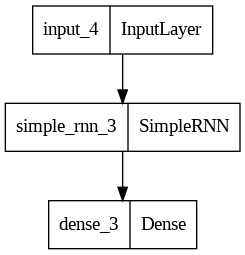

In [45]:
tf.keras.utils.plot_model(model)

In [46]:
model.layers[1].get_weights()

[array([[ 0.10122347, -0.830197  , -0.43985718, -0.52449787, -0.10303408],
        [-0.68581843, -0.84179187, -0.8654384 ,  0.01617205,  0.36120385],
        [ 0.8170182 ,  0.8377183 , -0.60604024,  0.4792003 , -0.6676134 ]],
       dtype=float32),
 array([[ 0.14659715,  0.3840403 , -0.45533198,  0.7391664 ,  0.27807975],
        [ 0.75545543, -0.6244283 , -0.19116417,  0.04923683,  0.02021231],
        [ 0.08655188,  0.09902805,  0.01057951, -0.4028351 ,  0.9057121 ],
        [ 0.14358479,  0.33895338, -0.7071065 , -0.53469944, -0.28034115],
        [-0.61618876, -0.5812973 , -0.50598204,  0.05504006,  0.15283231]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [47]:
a,b,c = model.layers[1].get_weights()
print(a.shape,b.shape,c.shape)

(3, 5) (5, 5) (5,)


In [54]:
#x - input layer
#h - hidden layer
#b - bias term
Wx,Wh,bh = model.layers[1].get_weights()
Wo,bo = model.layers[2].get_weights()

In [53]:
h_last = np.zeros(M)
x = X[0] #the one and only sample
Yhats = []

for t in range(T):
  h = np.tanh(x[t].dot(Wx) + h_last.dot(Wh) + bh)
  y = h.dot(Wo) + bo
  Yhats.append(y)

  last_h = h

#Print the final output
print(Yhats[-1])

[-0.86110587  0.16674246]
